### ***Regresyon Modellerinin Değerlendiriliemsi***
#### R Kare Nedir?
● R kare (R2), regresyonda en yaygın olarak bilinen değerlendirme ölçütleridnen biridir.

● R kare, regresyon denklemi ile belirlenen bağımlı değişkenlerin toplam değişkenliğe oranıdır.

$$
R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$

● R karenin en yaygon yorumu, regresyon modelinin gözlemlenen verilere ne kadar iyi uyduğudur. Örneğin %60'lık R kare, verilerin %60'ının regresyon modeline uyduğu ortaya koymaktadır. Genellikle, daha yüksek bir R kare, model için daha iyi bir uyumu gösterir.

### R Kare ile Regresyon Modellerinin Değerlendirilmesi
● Bu bölümde doğrusal regreresyon ve polinomsal regresyon modelleri oluşturarak, bu iki modeli R Kare yöntemi ile değerlendirebiliriz.

In [1]:
# Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score # r kare

In [2]:
df = pd.read_csv("Downloads/dogrusal_regresyon_veriseti.csv", sep = ';')
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


● Lütfen Sklearn sitesinden metrics paketini inceleyiniz. Kayda değer bilgiler bulunmaktadır.

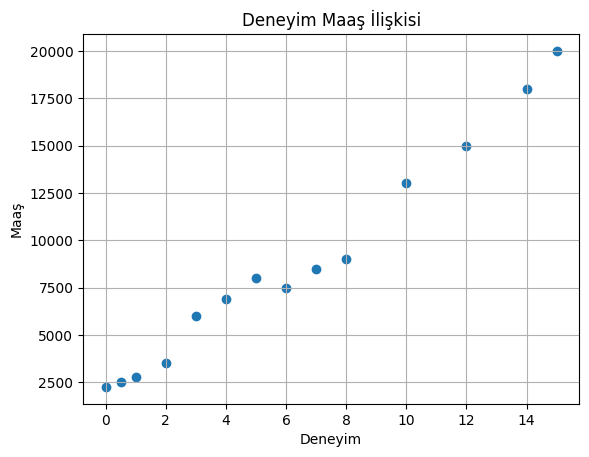

In [4]:
plt.scatter(df.deneyim, df.maas)
plt.xlabel("Deneyim")
plt.ylabel("Maaş")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [5]:
# Data içinde bulunan maaş ve deneyim kolonunu numpy array'e çeviriyoruz
x = df.deneyim.values.reshape(-1, 1)
y = df.maas.values.reshape(-1, 1)

In [7]:
linear_reg = LinearRegression()
linear_reg.fit(x, y)

LinearRegression()

In [11]:
polinom_reg = PolynomialFeatures(degree = 2)
x_polinom = polinom_reg.fit_transform(x) # önce x'i eğittik iki dereceli denklem gibi düşün

poly_reg = LinearRegression()
poly_reg.fit(x_polinom, y) # sonra geldik burada eğitilmiş x ile y'nin tahminlerini bulduk

LinearRegression()

### Tahmin ve Görselleştirme

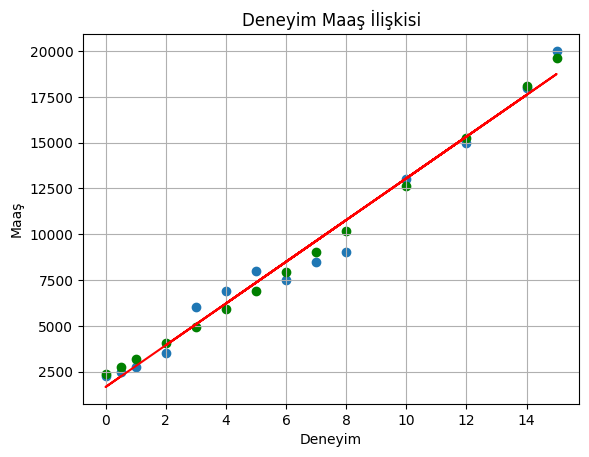

In [14]:
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_polinom = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim, df.maas)
plt.plot(x, y_tahmin_linear, c = 'r', label = 'Doğrusal')
plt.scatter(x, y_tahmin_polinom, c = 'g', label = 'Polinomsal')
plt.xlabel("Deneyim")
plt.ylabel("Maaş")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [17]:
print("Doğrusal Regresyon R kare: {}".format(r2_score(y, y_tahmin_linear)))
print("Polinomsal Regresyon R kare: {}".format(r2_score(y, y_tahmin_polinom)))

Doğrusal Regresyon R kare: 0.9775283164949903
Polinomsal Regresyon R kare: 0.9854449464578782


● Görüldüğü üzere, polinomsal regresyon modelinin R kare sonucu, doğrusal regresyon modelinin R kare sonucuna göre 1'e daha yakın.

● Polinomsal regresyon modelinin derecesi arttıkça, R kare 1'e daha da yaklaşacaktır.